## CARDIOVASCULAR DISEASE KNN CLASSIFICATION MODEL 

**INTRODUCTION**

According to the World Health Organization (WHO), cardiovascular disease is the leading global cause of death. In fact, over 17.9 million patients die from the disease each year and 229 billion dollars are spent anually on cardiovascular medical care in the United States alone. Cardiovascular disease is characterized by high blood pressure, cholesterol and chest pain which lead to heart failure, arrhythmia and heart attack symptoms. 

Due to the growing prevalence of machine learning algorithms in the health care sector, our goal is to create and train a model using the KNN classification algorithm that will predict whether individuals are likely to have cardiovascular disease based on various clinical attributes. 

**Research question**: Which individuls are likely to have cardiovascular disease according to various clinical attributes?

**PRELIMINARY DATA ANALYSIS**

The "hungarian heart disease" dataset obtained from the machine learning repository contains 294 observations representing the patients of the study. It has 14 columns which detail various clinical attributes associated with cardiovascular disease as well as whether or not the patient was diagnosed. 

We begin by loading the data set into R. We must add column names for each clinical attribute since the original dataset does not have any as well as change the columns to the correct data type. 

In [2]:
library(tidyverse)
library(tidymodels)
set.seed(123)

heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = FALSE)

heart_data_renamed <- rename(heart_data, 
                        age = X1, 
                        sex = X2, 
                        chest_pain_type= X3, 
                        resting_blood_pressure = X4, 
                        serum_cholestoral = X5, 
                        fasting_blood_sugar = X6, 
                        resting_electrocardiographic_results = X7, 
                        max_heart_rate = X8, 
                        exercise_induced_angina = X9, 
                        oldpeak = X10, 
                        slope = X11, 
                        number_vessels = X12, 
                        thal = X13, 
                        diagnosis = X14)            

heart_data_renamed <- heart_data_renamed |>
    mutate(across(c(diagnosis, sex, chest_pain_type, fasting_blood_sugar, resting_electrocardiographic_results,exercise_induced_angina), as.factor))|>
    mutate(across(c(resting_blood_pressure), as.numeric))
heart_data_renamed


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,slope,number_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<chr>,<fct>,<fct>,<chr>,<fct>,<dbl>,<chr>,<chr>,<chr>,<fct>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


We can create a new dataframe with only the following variables: age, resting blood pressure, blood cholestoral, maximum heart rate and the diagnosis. These will be the predictor variables in our model because they are good indicators of heart disease, have minimal missing values, and have numeric not categorical data. We can also filter out the observations with missing values.

In [3]:
tidy_heart_data <- heart_data_renamed  |>
    select(age, resting_blood_pressure, serum_cholestoral, max_heart_rate, diagnosis) |>
    filter(age != "?", resting_blood_pressure != "?", serum_cholestoral != "?", max_heart_rate != "?", diagnosis != "?")
tidy_heart_data

age,resting_blood_pressure,serum_cholestoral,max_heart_rate,diagnosis
<dbl>,<dbl>,<chr>,<chr>,<fct>
28,130,132,185,0
29,120,243,160,0
30,170,237,170,0
31,100,219,150,0
32,105,198,165,0
32,110,225,184,0
32,125,254,155,0
33,120,298,185,0
34,130,161,190,0


Since the data is in tidy format and the variables are of the correct data type, we can now divide our data set into a training set and a testing set using set.seed for a random yet reproducible split. 

In [4]:
split_heart_data <- initial_split(tidy_heart_data, prop = 0.75, strata = diagnosis)
training_heart_data <- training(split_heart_data)
testing_heart_data <- testing(split_heart_data)
glimpse(training_heart_data) 
glimpse(testing_heart_data)

Rows: 201
Columns: 5
$ age                    <dbl> 31, 32, 32, 32, 33, 34, 34, 35, 35, 35, 36, 36,…
$ resting_blood_pressure <dbl> 100, 105, 110, 125, 120, 130, 98, 120, 140, 120…
$ serum_cholestoral      <chr> "219", "198", "225", "254", "298", "161", "220"…
$ max_heart_rate         <chr> "150", "165", "184", "155", "185", "190", "150"…
$ diagnosis              <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
Rows: 69
Columns: 5
$ age                    <dbl> 28, 29, 30, 34, 35, 36, 37, 38, 38, 39, 41, 41,…
$ resting_blood_pressure <dbl> 130, 120, 170, 150, 150, 130, 120, 140, 145, 19…
$ serum_cholestoral      <chr> "132", "243", "237", "214", "264", "209", "260"…
$ max_heart_rate         <chr> "185", "160", "170", "168", "168", "178", "130"…
$ diagnosis              <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


We can now use the training data to create a summary table that shows the number and percentage of observations that do and do not have a heart disease diagnosis. As shown, there are 126 observations that do not have heart disease (37.31%) and 75 observations that do have heart disease (62.69%). 

In [5]:
summary_heart_data <- training_heart_data|>
    group_by(diagnosis)|>
    summarize(Count=n())|>
    mutate(Percent = Count/201)
summary_heart_data

diagnosis,Count,Percent
<fct>,<int>,<dbl>
0,126,0.6268657
1,75,0.3731343


We can also create a summary table of the means for the potential predictor variables. The average patient was middle-aged and had elevated blood pressures (healthy range is less than 120mm/Hg), blood cholesterol (healthy levels is less than 200mg/dL). However, the average maximum heart rates appear to be relatively normal. 

In [6]:
summary_heart_data_2 <- training_heart_data |>
    summarize(mean_age = mean(age, na.rm = TRUE), 
                mean_blood_pressure = mean(as.numeric(resting_blood_pressure), na.rm = TRUE),
                mean_cholestoral = mean(as.numeric(serum_cholestoral), na.rm = TRUE),
                mean_max_heart_rate = mean(as.numeric(max_heart_rate), na.rm = TRUE))
summary_heart_data_2

mean_age,mean_blood_pressure,mean_cholestoral,mean_max_heart_rate
<dbl>,<dbl>,<dbl>,<dbl>
48.22388,132.2786,253.3682,140.01


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


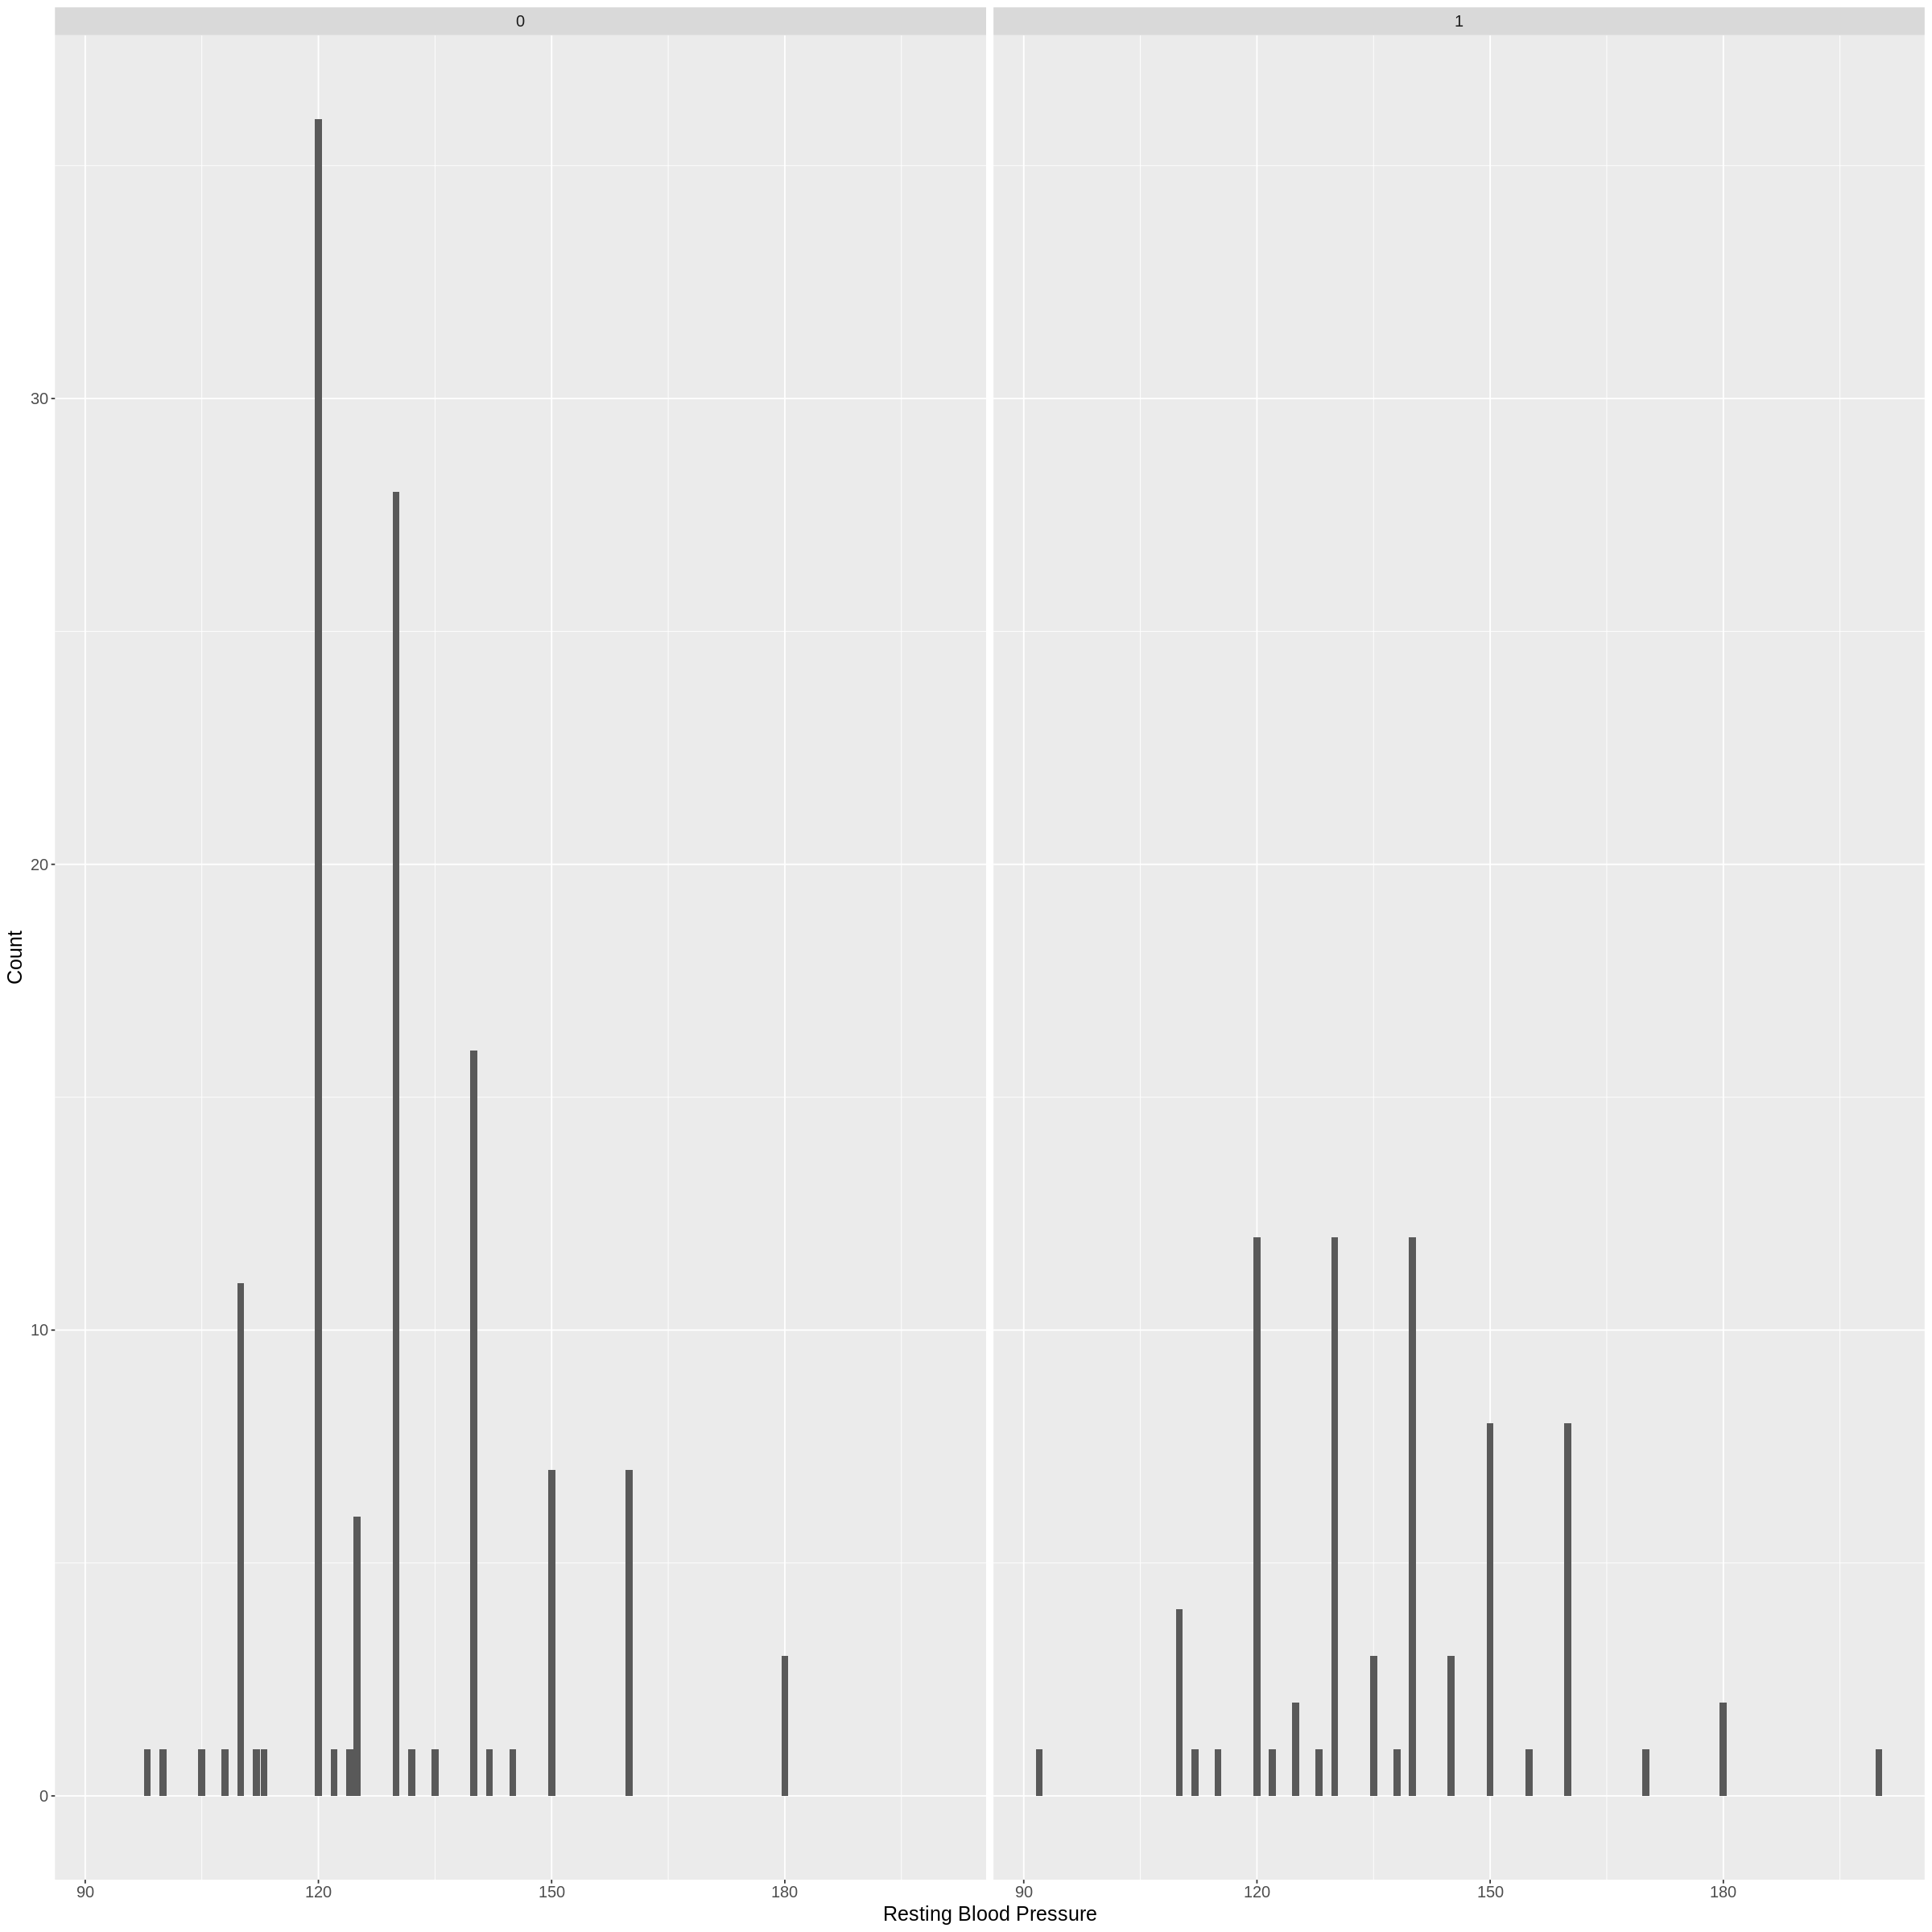

In [7]:
library(tidyverse)
options(repr.plot.width = 20, repr.plot.height = 20)

training_heart_data <- as_tibble(training_heart_data)
heart_plot2 <- ggplot(training_heart_data, aes(x = resting_blood_pressure)) +
               geom_histogram(stat="count") +
               labs(x = "Resting Blood Pressure", y = "Count") +
               theme(text = element_text(size = 15)) +
               facet_grid(cols = vars(diagnosis))

heart_plot2

Before we make our data visualizable, we notice there are a lot of variables may overlap each other by observing the histogram which reflects the resting blood pressure above.
To minimize the impact on reading in this case, we decide to use a combination of two variables to maximize the visibility of our data.
And the final visualization will be shown by the scatterpllot to make it convienient to analyzing.

We can now plot graphs using the training data to compare the predictor variables to each other while colouring the points by diagnosis to see the whether there is a relationship. 

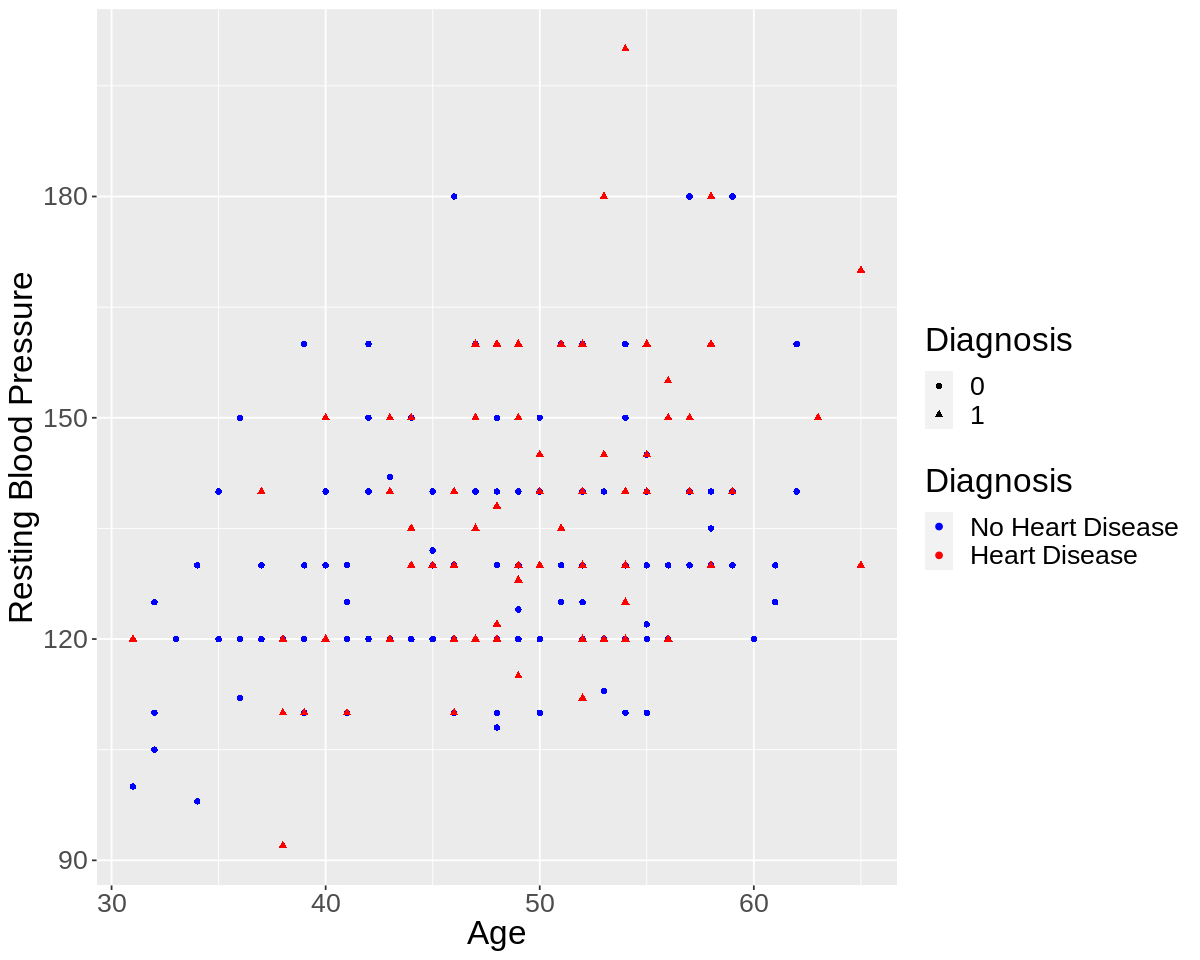

In [10]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_vs_blood_pressure_plot <- training_heart_data |>
    ggplot(aes(x = age, y = as.numeric(resting_blood_pressure), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Resting Blood Pressure", color = "Diagnosis", shape = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
age_vs_blood_pressure_plot

There does not appear to be a relationship between age and resting blood pressure in relation to the diagnosis of heart disease because the data points with class diagnosed and undiagnosed are evenly distributed. 

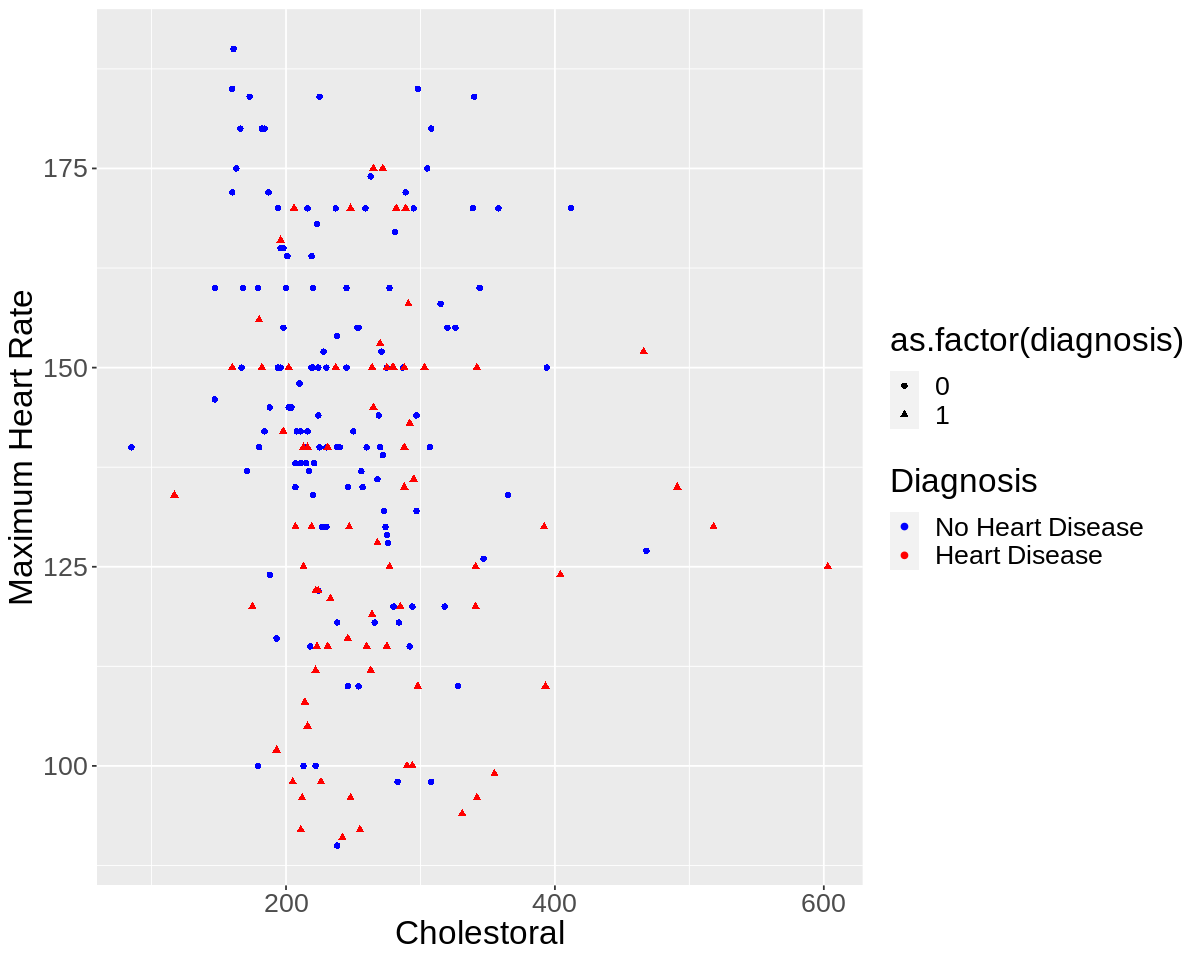

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_vs_max_heart_rate_plot <- training_heart_data |>
    ggplot(aes(x = as.numeric(serum_cholestoral), y = as.numeric(max_heart_rate), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Cholestoral", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
age_vs_max_heart_rate_plot 


Though difficult to see, the higher the maximum heart rate, the greater amount of patients had no heart disease. The higher the cholesterol, the greater amount of patients had heart disease. 

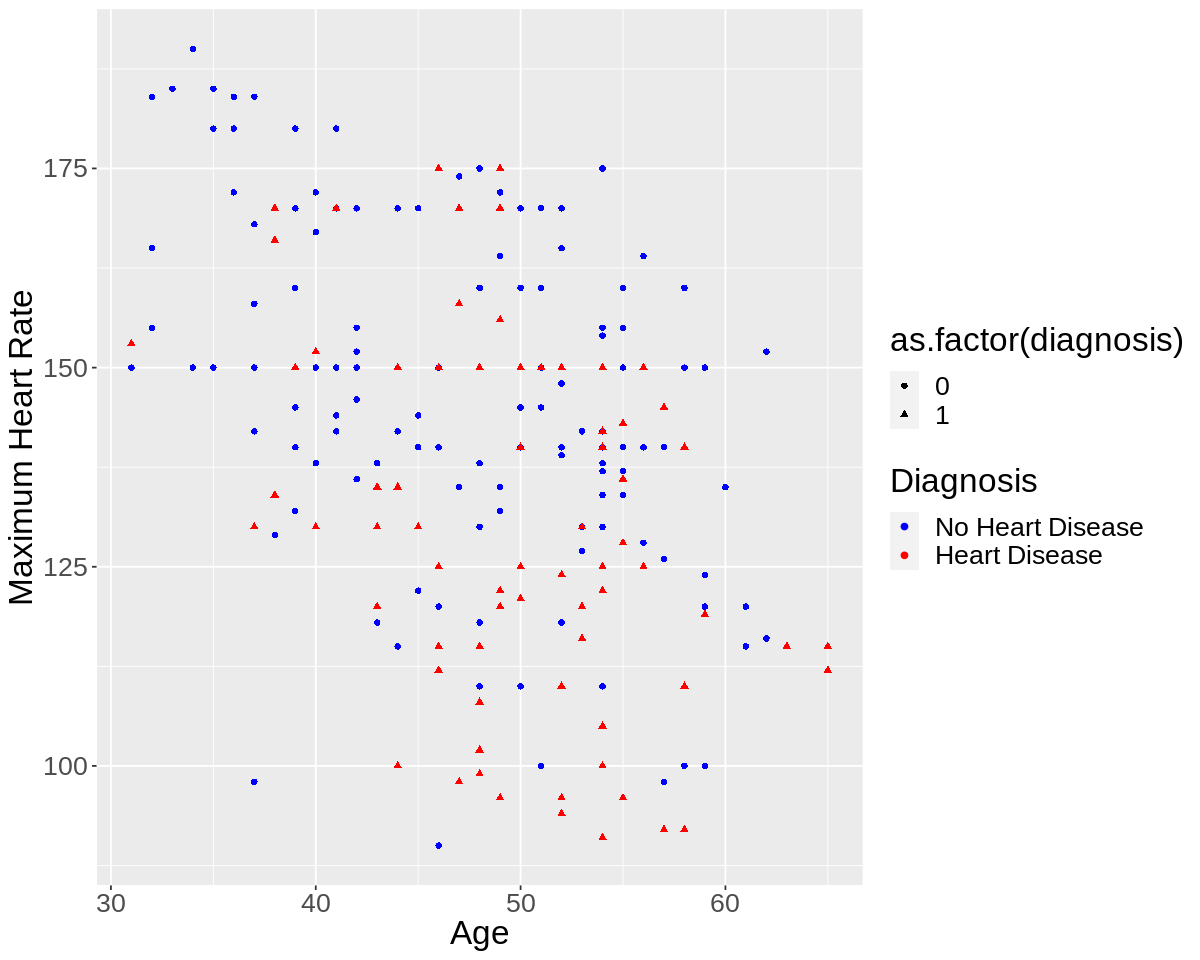

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)
max_heart_rate_vs_cholestoral_plot <- training_heart_data |>
    ggplot(aes(x = age, y = as.numeric(max_heart_rate), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
max_heart_rate_vs_cholestoral_plot

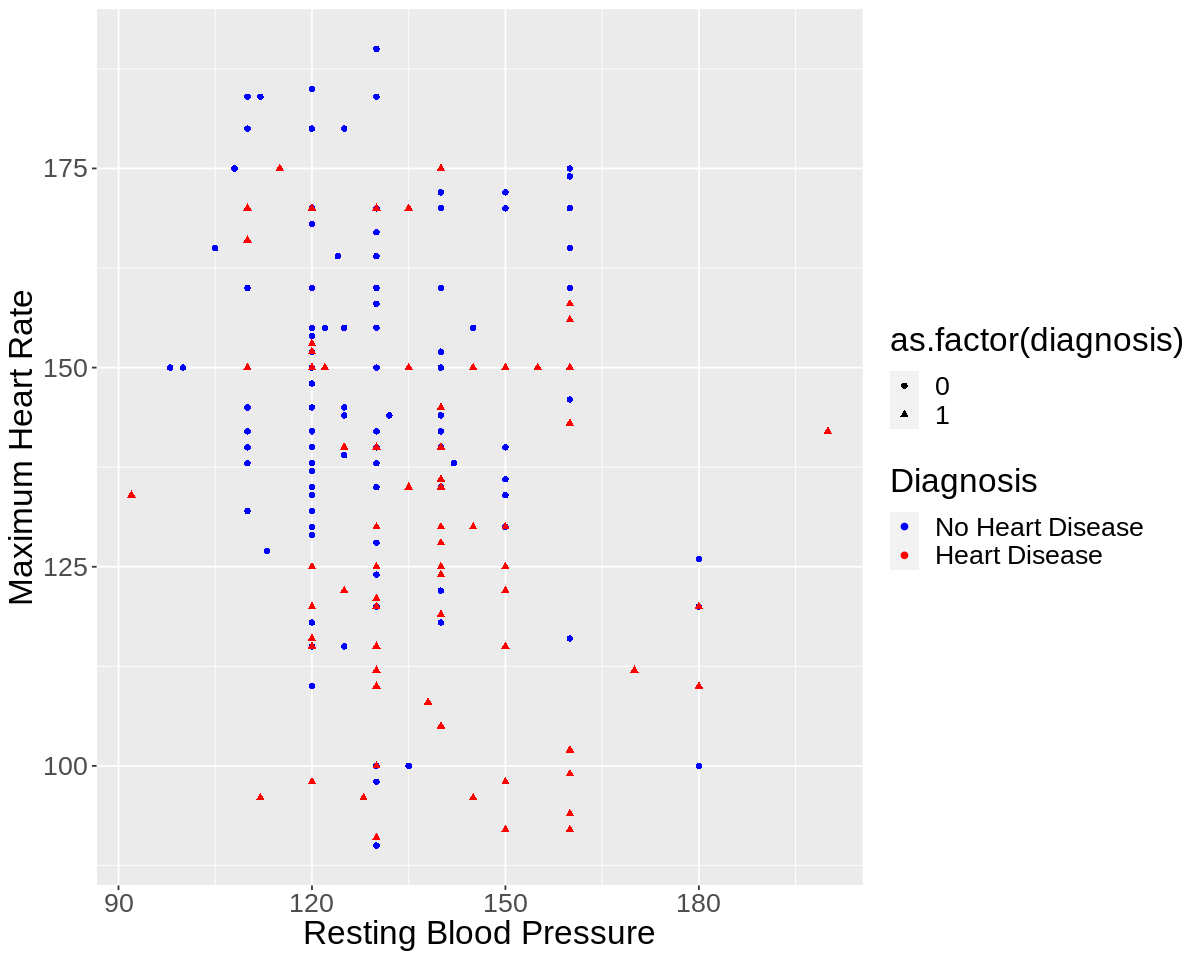

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)
resting_blood_pressure_vs_max_heart_rate_plot <- training_heart_data |>
    ggplot(aes(x = as.numeric(resting_blood_pressure), y = as.numeric(max_heart_rate), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Maximum Heart Rate", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
resting_blood_pressure_vs_max_heart_rate_plot

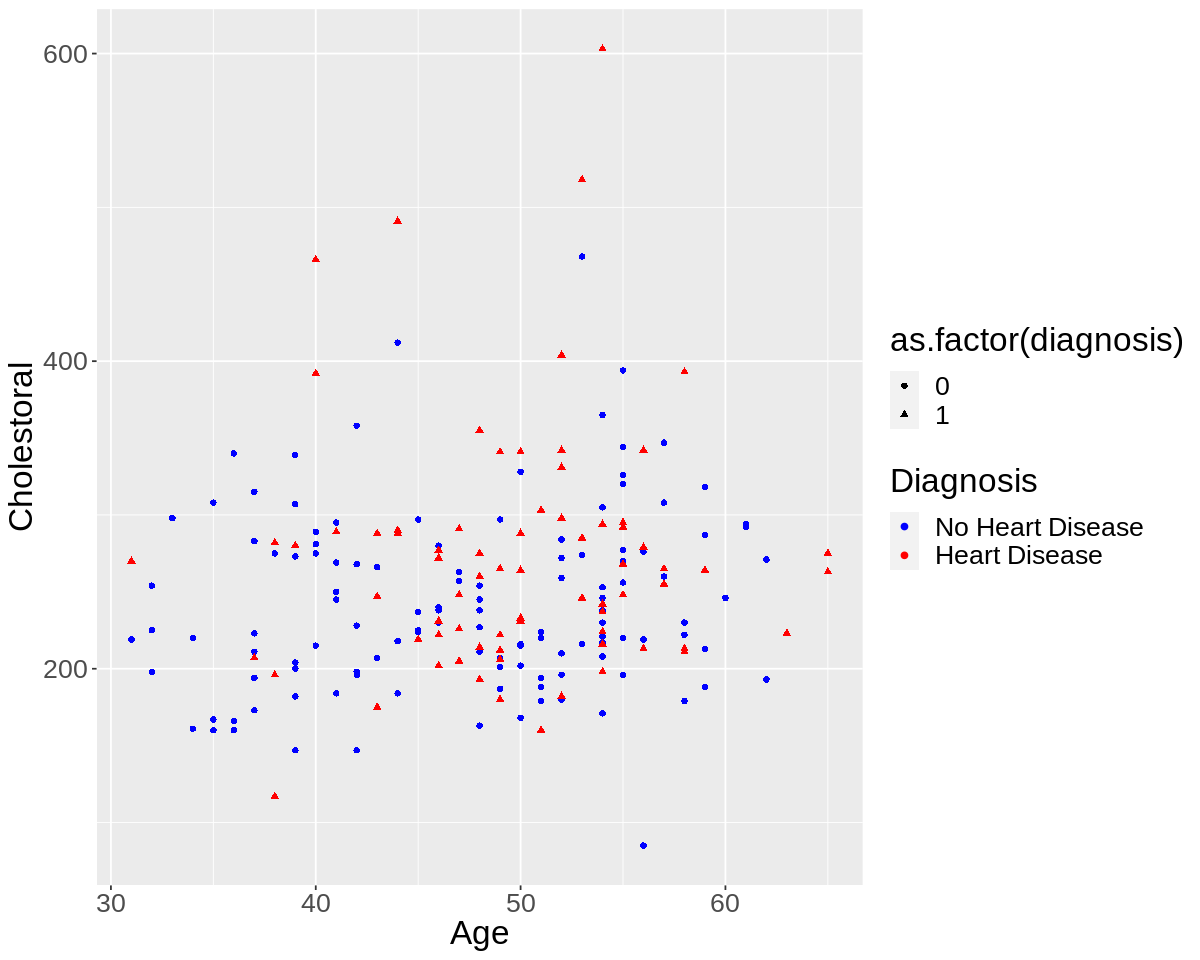

In [15]:
options(repr.plot.width = 10, repr.plot.height = 8)
age_vs_cholestoral_plot <- training_heart_data |>
    ggplot(aes(x = age, y = as.numeric(serum_cholestoral), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Age", y = "Cholestoral", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
age_vs_cholestoral_plot

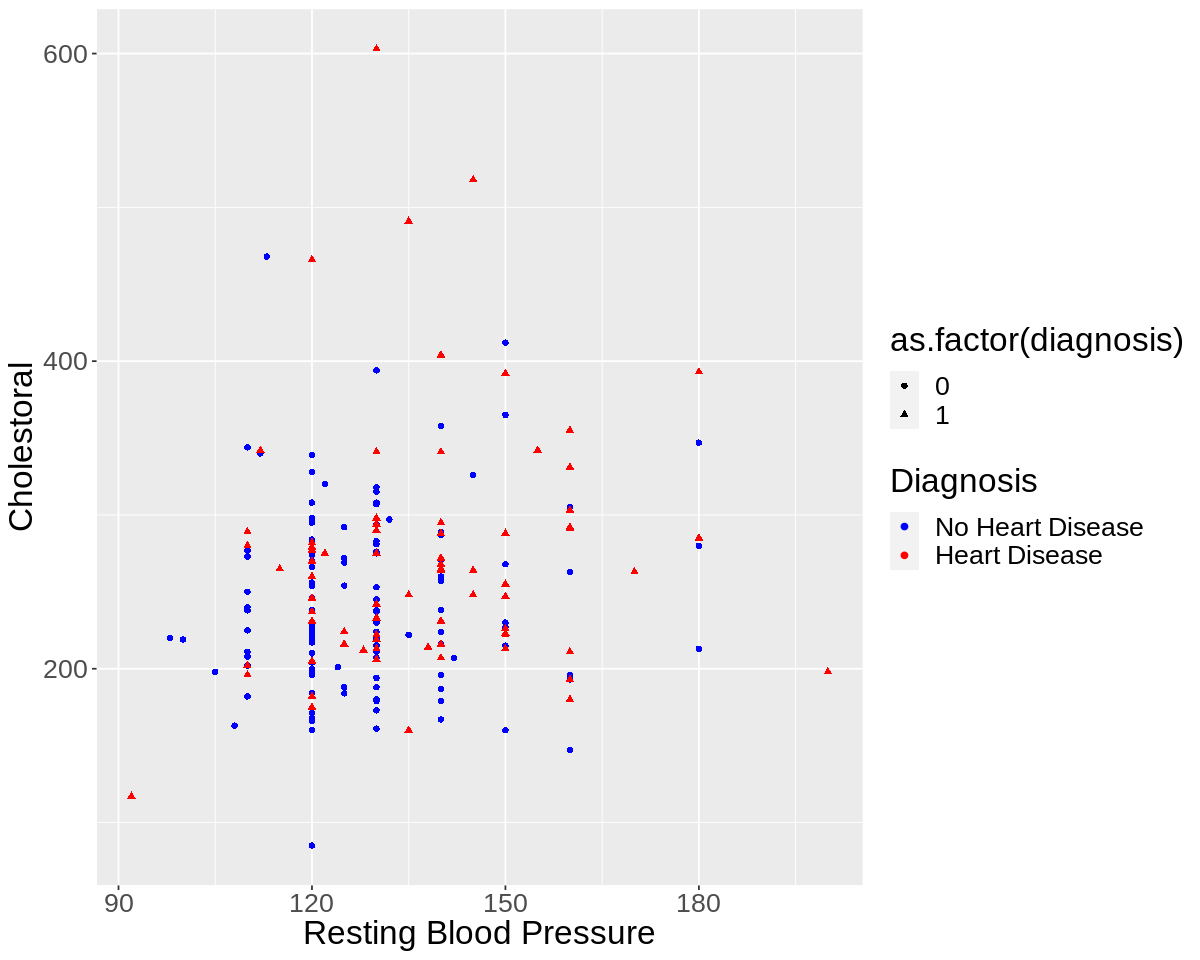

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)
cholestoral_vs_resting_blood_pressure_plot <- training_heart_data |>
    ggplot(aes(x = as.numeric(resting_blood_pressure), y = as.numeric(serum_cholestoral), color = as.factor(diagnosis), shape = as.factor(diagnosis))) +
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Cholestoral", color = "Diagnosis") +
    theme(text = element_text(size = 20)) +
    scale_color_manual(labels = c("No Heart Disease", "Heart Disease"), values = c("blue", "red"))
cholestoral_vs_resting_blood_pressure_plot


In [92]:
#our data doesnt seem to be showing any trends or correlations of the variables to heart disease.... is this bad? 
#I think we should also code by shape not just colour, but when I try to do that it shows two legends??

**METHODS**

We will create our model by scaling the predictor variables, creating a recipe, and training the model on the training data. Our classifier will be based on the following predictor variables: age, resting bloodpressure, serum cholestoral, and maximum heart rate. After tuning the model for the most accurate K value 5-fold using cross validation we will train the model on the the training set and then use it to predict the classes of the testing set to test its accuracy. 

**OUTCOMES AND SIGNIFICANCE** 

We expect our classifier to successfully predict whether individuals have heart disease. 

Future questions include whether we can create a classifier model that can predict the presence of a disease based on risk factors for another disease (correlation of two related diseases?). Further, we might ask whether other variables exist outside of the hungarian data set that might contribute to heart disease and improve the accuracy of the model we created. Or, how might we make these alrogithms more acessible in the health care industry or even for at home diagnosis. We might also ask how practitioners might be able to use classification algorithms such as ours to better treat patients with heart disease. Finally, we could ask which of these predictor variables are the most accurate in predicting heart disease on their own as this could indicate which symptoms are most important to look out for. 

This model is significant because it provides the opportunity to provide easier, faster and more accurate diagnosis without the need for diagnosis by a clinical practitioner? and can prevent life threats by predicting presence of heart disease based on risk factors like high blood pressure. Early diagnosis could potentially revolutionize health care for heart disease patients with risk factors by allowing for early treatment/care before the disease progresses to fatal levels. 